cada segundo es un elemento del arreglo


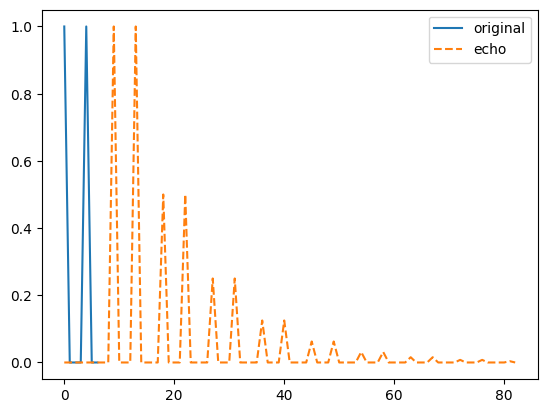

In [71]:
import numpy as np 
import sympy as sp
import matplotlib.pyplot as plt
from pydub.generators import Sine


x = [1,0,0,0,1,0,0]

def echo(x, atenuation , delay):
    
    delay = int(delay) + 1
    x_new = np.append(np.zeros(delay), x)
    x_new = np.append(x_new, np.zeros(int(1.5*atenuation*10*delay)))
    y = np.zeros(len(x_new)+delay)
    for i in range(delay, len(y)):
        y[i] = x_new[i-delay] + y[i - delay]*atenuation
    out = y[(2*delay):]
    return out

    #Ejemplo de aplicación
print("cada segundo es un elemento del arreglo")
#print("out", echo(x, 0.5,2))
plt.plot(x)
plt.plot(echo(x, 0.5,8), "--")

plt.legend(['original', 'echo'])

In [3]:
def echo_effect(audioin ,delay_sec ,Fs ,decay):
    
    filt = np.zeros(int(delay_sec*Fs+1))
    filt[0] = 1
    filt[int(delay_sec*Fs)] = decay
    audiout = np.convolve(audioin,filt,mode='same')
    return audiout
    
print(echo_effect(x, 1, 1, 0.5) )

[1.  0.5 0.  0.  1.  0.5 0. ]


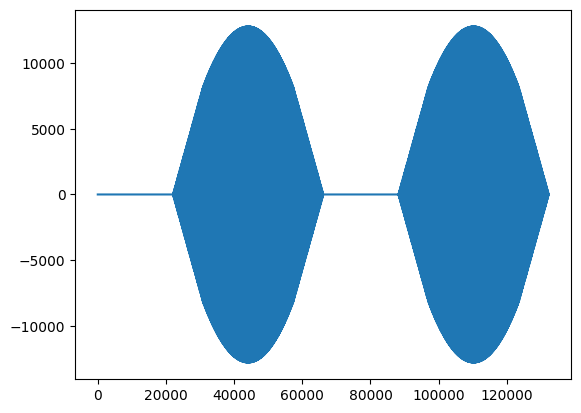

In [54]:
from pydub import AudioSegment
from pydub.generators import Sine
from IPython.display import Audio

frequency = 440
duration_s = 1  # Duración en segundos
duration_ms = duration_s * 1000  # Convertir a milisegundos

# Crear un segmento de audio de silencio
silence_duration_ms = 500  # Duración en milisegundos
silence = AudioSegment.silent(duration=silence_duration_ms)

# Crear dos señales sinusoidales
sine1 = Sine(frequency).to_audio_segment(duration=duration_ms)

silence = AudioSegment.silent(duration=silence_duration_ms)

sine2 = Sine(frequency).to_audio_segment(duration=duration_ms)

# Aplicar un efecto de desvanecimiento al inicio del sonido
fade_in_duration_ms = 800
sine1 = sine1.fade_in(fade_in_duration_ms)

# Aplicar un efecto de desvanecimiento al final del sonido
fade_duration_ms = 800
sine1 = sine1.fade_out(fade_duration_ms)

# Aplicar un efecto de desvanecimiento al inicio del sonido
sine2 = sine2.fade_in(fade_in_duration_ms)

# Aplicar un efecto de desvanecimiento al final del sonido
sine2 = sine2.fade_out(fade_duration_ms)

# Concatenar el silencio y las señales sinusoidales
tone = silence + sine1 + silence + sine2




# Guardar el tono en un archivo
tone.export("tone.wav", format="wav")

# Reproducir el archivo de audio


samples = tone.get_array_of_samples()
plt.plot(samples)
Audio("tone.wav")

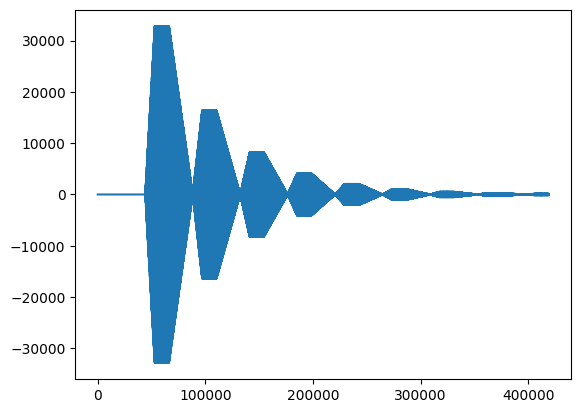

In [72]:
from pydub import AudioSegment
from pydub.generators import Sine
from IPython.display import Audio
import numpy as np
import scipy.io.wavfile as wav

frequency = 440
duration_s = 1  # Duración en segundos
duration_ms = duration_s * 1000  # Convertir a milisegundos

tone = Sine(frequency).to_audio_segment(duration=duration_ms)


# Aplicar un efecto de desvanecimiento al inicio del sonido
fade_in_duration_ms = 200
tone = tone.fade_in(fade_in_duration_ms)

# Aplicar un efecto de desvanecimiento al final del sonido
fade_duration_ms = 500  # La duración del desvanecimiento es igual a la duración total del sonido
tone = tone.fade_out(fade_duration_ms)

# Acceder al arreglo de datos de audio
samples = tone.get_array_of_samples()

# Convertir a un objeto numpy.array y realizar modificaciones
# samples_np = np.array(samples, dtype=np.float32)

#la señal dura 3 segundos

samples_np = echo(samples, 0.5, 1*44100)
plt.plot(samples_np)

#reproducir el arreglo de datos de audio editado

#exporto el array como .wav

# Convertir el arreglo de numpy a int16
samples_np_int16 = (samples_np).astype(np.int16)

# Exportar el arreglo como un archivo .wav
wav.write("samples_np.wav", tone.frame_rate, samples_np_int16)

Audio(samples_np, rate=tone.frame_rate)